# SL-RAT Score Prediction Project 

### Introduction

This dataset contains the data from Baltimore County Sewer System SL-RAT Scores.
As the raw dataset is limited and cannot be shared publicly, the following output provides a limited view of the data and serves as a limited exploration of the dataset.

### Data and Setup

The following columns contain SL-RAT Score data and GIS Attributes data from Baltimore County Sewer Systems.
 

- `FACILITYID`: Unique number between two manholes. 
- `Workorderid`: Unique Workorder Number for each assesments for the asset. 
- `ACTIVITY_CODE`: Activity type on each assessment 
- `COMPLETED_DATE`: Finish day of Activity  
- `SLRAT_SCORE`: Sl-rat scores between 0-10.
- `TYPE`: Type of the pipe 
- `LINING_TYP`: Type of the pipe connections
- `PIPE_SIZE`: Size of Pipe  
- `PIPE_MATER`: Material of Pipe
- `SLOPE`: Slope for each FacilityID 
- `LENGTH`: Lenght of Pipe
- `INSTALL_DA`: Time since the installation date


### 1.  Importing Libraries 

In [54]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import time
print('Pandas',pd.__version__)

Pandas 1.3.4


### 2. Reading the data from Workorder table

In [55]:
# read the SLRAT data 
df= pd.read_excel('sl-rat-92123.xlsx')
# df= pd.read_excel('SLRAT_analysis.xlsx')

if 'FacilityID' in df.columns:
    df['FACILITYID'] = df['FacilityID']
    df['COMPLETED_DATE'] = df['ACTUALFINISHDATE']
    df.drop(['FacilityID', 'ACTUALFINISHDATE'], inplace=True, axis =1 )


# needed_rows = ['SLRAT' in x or 'Clean' in x for x in df['ACTIVITY_CODE']]
# df = df[needed_rows].reset_index(drop=True).copy()
df.head()

,WORKORDERID,DESCRIPTION,ENTITYTYPE,SLRAT_SCORE,CATEGORY,rk,FACILITYID,COMPLETED_DATE
0,1052432,Gravity Main-SLRAT,SSGRAVITYMAIN,9,SLRAT,1,29333-29332,2023-09-21 11:30:00
1,1052437,Gravity Main-SLRAT,SSGRAVITYMAIN,9,SLRAT,1,29335-29334,2023-09-21 11:00:00
2,1052449,Gravity Main-SLRAT,SSGRAVITYMAIN,7,SLRAT,1,30140-30138,2023-09-21 10:50:00
3,1052443,Gravity Main-SLRAT,SSGRAVITYMAIN,7,SLRAT,1,30149-30148,2023-09-21 10:35:00
4,1053518,Gravity Main-SLRAT,SSGRAVITYMAIN,1,SLRAT,1,902082-902081,2023-09-20 15:00:00


### 3.  Check for missing values and datatypes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43584 entries, 0 to 43583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WORKORDERID     43584 non-null  int64         
 1   DESCRIPTION     43584 non-null  object        
 2   ENTITYTYPE      43584 non-null  object        
 3   SLRAT_SCORE     38808 non-null  object        
 4   CATEGORY        43584 non-null  object        
 5   rk              43584 non-null  int64         
 6   FACILITYID      43584 non-null  object        
 7   COMPLETED_DATE  39717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.7+ MB


### 4. Getting Neccessary Columns from Workorder table

In [57]:
#Select necessary columns from SL-RAT file
columns= ['FACILITYID','COMPLETED_DATE', 'SLRAT_SCORE', 'rk']

In [58]:
df=df[columns]

In [59]:
df.head()

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,29333-29332,2023-09-21 11:30:00,9,1
1,29335-29334,2023-09-21 11:00:00,9,1
2,30140-30138,2023-09-21 10:50:00,7,1
3,30149-30148,2023-09-21 10:35:00,7,1
4,902082-902081,2023-09-20 15:00:00,1,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43584 entries, 0 to 43583
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      43584 non-null  object        
 1   COMPLETED_DATE  39717 non-null  datetime64[ns]
 2   SLRAT_SCORE     38808 non-null  object        
 3   rk              43584 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.3+ MB


### 5. Exploring the data!

Let's explore the data!

In [61]:
df = df.sort_values(by=['FACILITYID','COMPLETED_DATE']).reset_index(drop=True).copy()
df.head(50)

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,0,NaT,NaN,1
1,0,NaT,NaN,1
2,0,NaT,NaN,1
3,0,NaT,NaN,1
4,0,NaT,NaN,1
5,0,NaT,NaN,1
6,0,NaT,NaN,1
7,0,NaT,NaN,1
8,0,NaT,NaN,1
9,46868,2022-12-20 13:00:00,9,1


### Removal of Unnecessary Data

We need only sl-rat scores that occur more than once. To identify and remove unnecessary SL-rat scores,first added an "rk" column to show which scores occur more than once. After identifying these scores,removed the "rk" column.
Note: The "rk" column is added through the SQL query when collecting the data to indicate how many times each asset receives a score.

In [62]:
# # Adding&removing rk column to get rid of the unnecessary sl-rat scores
# counts = df.FACILITYID.value_counts().to_dict()

# df['rk'] = [counts[x] for x in df.FACILITYID]

# df = df[df.rk > 1].reset_index(drop=True).copy()
# df.drop('rk', axis=1, inplace=True)

fac = set( df[df.rk>1]['FACILITYID'])
print(len(fac))
df = df[df.FACILITYID.isin(fac)].sort_values(by=['FACILITYID', 'COMPLETED_DATE'], ascending=[True, False]).copy().reset_index(drop=True)
df

5071


,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,1000-1000M,2017-10-26,0,1
1,1000-1000M,2015-12-05,2,2
2,1000-1000M,NaT,NaN,3
3,1000M-1008,2015-12-05,0,1
4,1000M-1008,NaT,NaN,2
...,...,...,...,...
12840,TCM19-11468,NaT,NaN,2
12841,TCM52-TCM22,2017-09-19,NaN,1
12842,TCM52-TCM22,NaT,NaN,2
12843,TCM78-1015,2019-01-16,4,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      12845 non-null  object        
 1   COMPLETED_DATE  11252 non-null  datetime64[ns]
 2   SLRAT_SCORE     11274 non-null  object        
 3   rk              12845 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 401.5+ KB


In [64]:
df.shape

(12845, 4)

In [65]:
df

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
0,1000-1000M,2017-10-26,0,1
1,1000-1000M,2015-12-05,2,2
2,1000-1000M,NaT,NaN,3
3,1000M-1008,2015-12-05,0,1
4,1000M-1008,NaT,NaN,2
...,...,...,...,...
12840,TCM19-11468,NaT,NaN,2
12841,TCM52-TCM22,2017-09-19,NaN,1
12842,TCM52-TCM22,NaT,NaN,2
12843,TCM78-1015,2019-01-16,4,1


In [67]:
df[df.FACILITYID=='5908-5907']

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE,rk
10006,5908-5907,2019-08-13,0,1
10007,5908-5907,2019-04-25,2,2
10008,5908-5907,NaT,NaN,3


### 7. Calculating the degradation rate for the Completed Date field.


This calculation displays the rate of change in SL-RAT scores between the first two occurrences in the COMPLETED_DATE column.

In [68]:
import numpy as np
def agg_func(x):
    """
    I have made an assumption here. 
    it may have many records and on multiple records, pipes may have been cleaned in between.
    so I checked only the first 2 occurance and calculated the rate.
    eg: first rate 9  on March 1
    second rate 7 on March 15
    I calculated the rate by (7 - 9) / 30 
    
    if rate is positive, I used none because probably it is cleaned and I cannot calculate the rate
    """
    
    sc = list(x.SLRAT_SCORE)
    dt = list(x.COMPLETED_DATE)
#     name = x.FACILITYID.values[0]
    
    for i in range(len(sc)):
        sc_ = sc[i: i+2]
        dt_ = dt[i: i+2]
        
        if len(sc_) != 2:
#             print(name, len(sc_))
            return None
    
        if pd.isna(sc_).sum() == 0 and pd.isna(dt_).sum() == 0:
            sc1 = sc_[1]
            sc0 = sc_[0]
            dt1 = dt_[1]
            dt0 = dt_[0]
            break
    
#     print(sc0, sc1, dt0, dt1)
    if pd.isna(sc1) or pd.isna(sc0):
        return None
    
    if sc1 <= sc0:
        return None
    
    days = (dt1 - dt0).days
    if days == 0:
        return None
    
    rate =  (int(sc1) - int(sc0)) / days
#     print(rate)
    return rate

In [69]:
rate = df.groupby(by='FACILITYID').apply(agg_func)
rate

FACILITYID
1000-1000M    -0.002894
1000M-1008          NaN
1004-946      -0.003315
10043-10042         NaN
10044-10043         NaN
                 ...   
M401-17621    -0.000508
NS968-14335         NaN
TCM19-11468         NaN
TCM52-TCM22         NaN
TCM78-1015          NaN
Length: 5071, dtype: float64

In [70]:
len(rate)

5071

In [71]:
sum (rate < 0)

1284

In [72]:
df_rate = pd.DataFrame()
df_rate['FACILITYID'] = rate.index
df_rate['rate'] = rate.values

df_rate.dropna(inplace=True)
df_rate.shape

(1284, 2)

I'm trying to get more data.

### 8. It is time to combine GIS table attributes to Workorder table

In [73]:
#Read the data from GIS features
df_GIS= pd.read_excel('ssGravityMain-GIS_Attributes.xlsx')

In [74]:
df_GIS.head().T

,0,1,2,3,4
FACILITYID,42453-42452,42458-42457,42457-42452,42452-42451,42451-42450
TYPE,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR
SEWER_SERV,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00
PIPE_SIZE,8,8,8,8,8
PIPE_MATER,UNKNOWN,ASBESTOS CEMENT,ASBESTOS CEMENT,UNKNOWN,UNKNOWN
SLOPE,1.7,0.4,0.4,0.4,0.4
DESIGN_LEN,70.3,71.3,139.1,335.8,387.7
LENGTH,70.33,71.3,139.18,335.83,387.79
UPSTREAM_I,688.36,688.1,687.72,687.07,685.63
DOWNSTREAM,687.17,687.82,687.17,685.73,684.03


In [75]:
#Select important columns from GIS
GIS_columns= [
    'FACILITYID',
    'TYPE',
    'LINING_TYP',
    'PIPE_SIZE',
    'PIPE_MATER',
    'SLOPE',
    'LENGTH',
    'INSTALL_DA',
    'UPSTREAM_I',
    'DOWNSTREAM'
]
df_GIS = df_GIS[GIS_columns]

In [76]:
df_GIS.head()

,FACILITYID,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA,UPSTREAM_I,DOWNSTREAM
0,42453-42452,COLLECTOR,NONE,8,UNKNOWN,1.7,70.33,1970-01-01,688.36,687.17
1,42458-42457,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,71.30,1970-01-01,688.10,687.82
2,42457-42452,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,139.18,1970-01-01,687.72,687.17
3,42452-42451,COLLECTOR,NONE,8,UNKNOWN,0.4,335.83,1970-01-01,687.07,685.73
4,42451-42450,COLLECTOR,NONE,8,UNKNOWN,0.4,387.79,1970-01-01,685.63,684.03


In [77]:
df_GIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62728 entries, 0 to 62727
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FACILITYID  62728 non-null  object        
 1   TYPE        62728 non-null  object        
 2   LINING_TYP  62663 non-null  object        
 3   PIPE_SIZE   62728 non-null  int64         
 4   PIPE_MATER  62371 non-null  object        
 5   SLOPE       62728 non-null  float64       
 6   LENGTH      62728 non-null  float64       
 7   INSTALL_DA  61600 non-null  datetime64[ns]
 8   UPSTREAM_I  62728 non-null  float64       
 9   DOWNSTREAM  62728 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 4.8+ MB


In [78]:
#Combining two data frame 
df_merged = pd.merge(df_rate, df_GIS,  how='left', left_on=['FACILITYID'],right_on=['FACILITYID'])

In [79]:
df_merged.drop('FACILITYID', axis=1, inplace=True)

In [80]:
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA,UPSTREAM_I,DOWNSTREAM
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,1926-01-01,464.26,462.33
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,1926-01-01,478.42,469.26
2,-0.004082,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,1926-01-01,390.86,384.75
3,-0.005780,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,1950-01-01,10.14,9.93
4,-0.002833,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,0.60,314.27,1950-01-01,17.49,15.65


In [81]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rate        1284 non-null   float64       
 1   TYPE        1280 non-null   object        
 2   LINING_TYP  1280 non-null   object        
 3   PIPE_SIZE   1280 non-null   float64       
 4   PIPE_MATER  1280 non-null   object        
 5   SLOPE       1280 non-null   float64       
 6   LENGTH      1280 non-null   float64       
 7   INSTALL_DA  1264 non-null   datetime64[ns]
 8   UPSTREAM_I  1280 non-null   float64       
 9   DOWNSTREAM  1280 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 110.3+ KB


In [82]:
# Converting datetime variable 
today = np.datetime64('today') 

def days_passed(d):
    return ( today - d).days


In [83]:
df_merged['time_since_install_da'] = [days_passed(x) for x in df_merged['INSTALL_DA']]
df_merged.drop('INSTALL_DA', axis=1, inplace=True)
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,464.26,462.33,35692.0
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,478.42,469.26,35692.0
2,-0.004082,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,390.86,384.75,35692.0
3,-0.005780,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,10.14,9.93,26926.0
4,-0.002833,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,0.60,314.27,17.49,15.65,26926.0


In [84]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rate                   1284 non-null   float64
 1   TYPE                   1280 non-null   object 
 2   LINING_TYP             1280 non-null   object 
 3   PIPE_SIZE              1280 non-null   float64
 4   PIPE_MATER             1280 non-null   object 
 5   SLOPE                  1280 non-null   float64
 6   LENGTH                 1280 non-null   float64
 7   UPSTREAM_I             1280 non-null   float64
 8   DOWNSTREAM             1280 non-null   float64
 9   time_since_install_da  1264 non-null   float64
dtypes: float64(7), object(3)
memory usage: 110.3+ KB


In [85]:
#check the number of rows and columns in the dataframe
df_merged.shape

(1284, 10)

Now, the data is ready for further analysis.


### 11. Sanity check and handling Data Inconsistencies


### Visualizations

<AxesSubplot:>

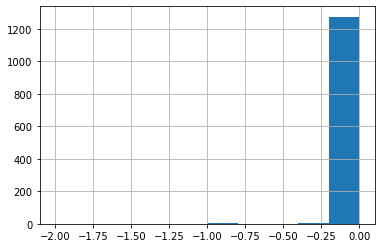

In [86]:
df_merged.rate.hist()

<AxesSubplot:>

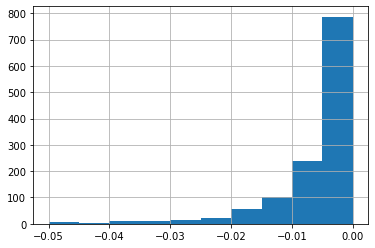

In [87]:
#print(df_merged.rate.value_counts())
df_merged.rate.hist(range=[-0.05 ,0])

COLLECTOR          1279
INVERTED SIPHON       1
Name: TYPE, dtype: int64


<AxesSubplot:>

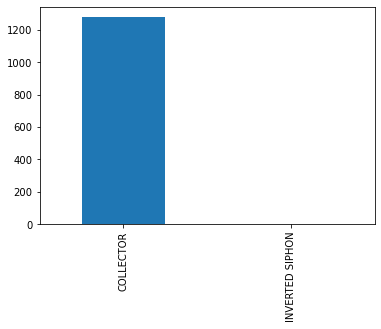

In [88]:
print(df_merged.TYPE.value_counts())
df_merged.TYPE.value_counts().plot(kind='bar')

NONE              1107
CURED IN PLACE     155
FOLD AND FORM       11
UNKNOWN              4
Cured in Place       3
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

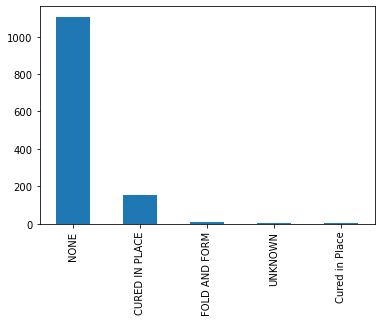

In [89]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

I noticed some inconsistencies and fixed them below

In [90]:
df_merged.replace({
    'Cured in Place': 'CURED IN PLACE'
}, inplace=True)

NONE              1107
CURED IN PLACE     158
FOLD AND FORM       11
UNKNOWN              4
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

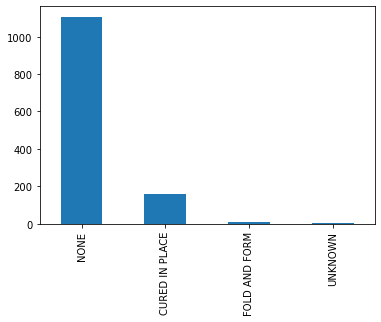

In [91]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

<AxesSubplot:>

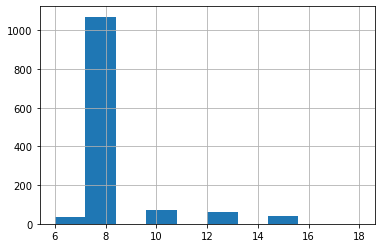

In [92]:
df_merged.PIPE_SIZE.hist()

VITRIFIED CLAY PIPE                963
POLYVINYL CHLORIDE                 113
UNKNOWN                             86
CAST IRON                           44
DUCTILE IRON PIPE                   43
ACRYLONITRILE BUTADIENE STYRENE     14
CONCRETE PIPE                       11
ASBESTOS CEMENT                      3
REINFORCED PLASTIC PIPE              3
Name: PIPE_MATER, dtype: int64


<AxesSubplot:>

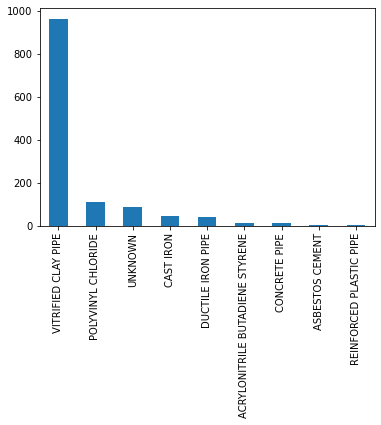

In [93]:

print(df_merged.PIPE_MATER.value_counts())
df_merged.PIPE_MATER.value_counts().plot(kind='bar')

<AxesSubplot:>

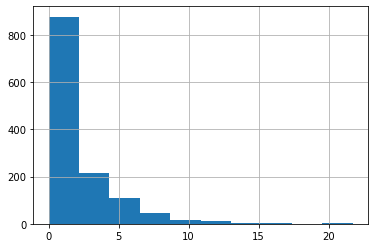

In [94]:
df_merged.SLOPE.hist()

<AxesSubplot:>

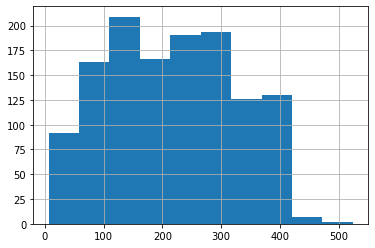

In [95]:
df_merged.LENGTH.hist()

### 12. Calculating Target Values

The target variable will be 1 or 0. If the target variable is 0, it needs to clean within five months; otherwise, the pipeline doesn't require cleaning.

